In [1]:
## Import necessary packages
%matplotlib inline
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import folium

In [2]:
# Load in the Austin crime dataset
# df = os.path.join('Resources', 'Crime_Reports.csv')

datafile = '../Resources/Crime_Reports.csv'

In [3]:
data = pd.read_csv(datafile)
data.head()

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2.017115e+08,AGG ASLT STRANGLE/SUFFOCATE,410,Y,1/1/2017 10:30,1/1/2017,1030,1/1/2017 11:58,1/1/2017,1158,...,NaN,C,1/10/2017,13A,Aggravated Assault,3130704.0,3130704.0,30.359794,-97.688358,"(30.35979391, -97.688358)"
1,2.017100e+08,AGG ASSAULT,402,N,1/1/2017 0:07,1/1/2017,7,1/1/2017 0:07,1/1/2017,7,...,NaN,NaN,NaN,13A,Aggravated Assault,3114768.0,3114768.0,30.268162,-97.741362,"(30.26816195, -97.74136237)"
2,2.017109e+08,AGG ASSAULT,402,N,1/1/2017 4:20,1/1/2017,420,1/1/2017 4:20,1/1/2017,420,...,NaN,N,3/8/2017,13A,Aggravated Assault,3131193.0,3131193.0,30.318604,-97.687937,"(30.3186038, -97.68793685)"
3,2.017503e+10,AGG ASSAULT FAM/DATE VIOLENCE,402,Y,1/1/2017 0:00,1/1/2017,0,8/10/2017 8:30,8/10/2017,830,...,NaN,O,8/17/2017,13A,Aggravated Assault,3099695.0,3099695.0,30.196029,-97.791021,"(30.1960291, -97.79102086)"
4,2.019239e+10,AGG FORCED SODOMY,1718,N,1/1/2017 21:29,1/1/2017,2129,8/27/2019 21:29,8/27/2019,2129,...,NaN,C,10/29/2019,11B,Rape,0.0,0.0,NaN,NaN,NaN


In [4]:
data.columns

Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
Newdata = data.drop(columns=["Incident Number", "Highest Offense Code", "Family Violence", 'Occurred Date', 'Report Date Time', 'Report Date',
       'Report Time', 'Address', 'Council District', 'APD Sector', 'Clearance Status', 'Clearance Date', 'UCR Category', 'Latitude', 'Longitude', 'APD District', 'PRA', 'Census Tract'])
Newdata.head()

,Highest Offense Description,Occurred Date Time,Occurred Time,Location Type,Zip Code,Category Description,X-coordinate,Y-coordinate,Location
0,AGG ASLT STRANGLE/SUFFOCATE,1/1/2017 10:30,1030,HOTEL / MOTEL / ETC.,78753.0,Aggravated Assault,3130704.0,3130704.0,"(30.35979391, -97.688358)"
1,AGG ASSAULT,1/1/2017 0:07,7,STREETS / HWY / ROAD / ALLEY,78701.0,Aggravated Assault,3114768.0,3114768.0,"(30.26816195, -97.74136237)"
2,AGG ASSAULT,1/1/2017 4:20,420,PARKING LOTS / GARAGE,78723.0,Aggravated Assault,3131193.0,3131193.0,"(30.3186038, -97.68793685)"
3,AGG ASSAULT FAM/DATE VIOLENCE,1/1/2017 0:00,0,RESIDENCE / HOME,78745.0,Aggravated Assault,3099695.0,3099695.0,"(30.1960291, -97.79102086)"
4,AGG FORCED SODOMY,1/1/2017 21:29,2129,RESIDENCE / HOME,78753.0,Rape,0.0,0.0,NaN


In [6]:
Newdata.dropna()

,Highest Offense Description,Occurred Date Time,Occurred Time,Location Type,Zip Code,Category Description,X-coordinate,Y-coordinate,Location
0,AGG ASLT STRANGLE/SUFFOCATE,1/1/2017 10:30,1030,HOTEL / MOTEL / ETC.,78753.0,Aggravated Assault,3130704.0,3130704.0,"(30.35979391, -97.688358)"
1,AGG ASSAULT,1/1/2017 0:07,7,STREETS / HWY / ROAD / ALLEY,78701.0,Aggravated Assault,3114768.0,3114768.0,"(30.26816195, -97.74136237)"
2,AGG ASSAULT,1/1/2017 4:20,420,PARKING LOTS / GARAGE,78723.0,Aggravated Assault,3131193.0,3131193.0,"(30.3186038, -97.68793685)"
3,AGG ASSAULT FAM/DATE VIOLENCE,1/1/2017 0:00,0,RESIDENCE / HOME,78745.0,Aggravated Assault,3099695.0,3099695.0,"(30.1960291, -97.79102086)"
32,AUTO THEFT,1/1/2017 23:15,2315,PARKING LOTS / GARAGE,78704.0,Auto Theft,3115011.0,3115011.0,"(30.24674665, -97.74116743)"
...,...,...,...,...,...,...,...,...,...
236452,THEFT OF AUTO PARTS,12/11/2020 1:45,145,RESIDENCE / HOME,78723.0,Theft,3131148.0,3131148.0,"(30.31066814, -97.68829704)"
236453,AGG ASSAULT FAM/DATE VIOLENCE,12/12/2020 8:17,817,RESIDENCE / HOME,78741.0,Aggravated Assault,3127153.0,3127153.0,"(30.21566282, -97.70355009)"
236454,BURGLARY NON RESIDENCE,12/12/2020 4:22,422,LIQUOR STORE,78701.0,Burglary,3114539.0,3114539.0,"(30.2788339, -97.74180149)"
236455,BURGLARY OF RESIDENCE,12/12/2020 11:35,1135,RESIDENCE / HOME,78753.0,Burglary,3139919.0,3139919.0,"(30.38232768, -97.65850695)"


In [7]:
# Count number of observations for each crime
Newdata['Category Description'].value_counts()

Theft                 58595
Burglary               9662
Auto Theft             6934
Aggravated Assault     5368
Robbery                2241
Rape                   1691
Murder                   80
Name: Category Description, dtype: int64

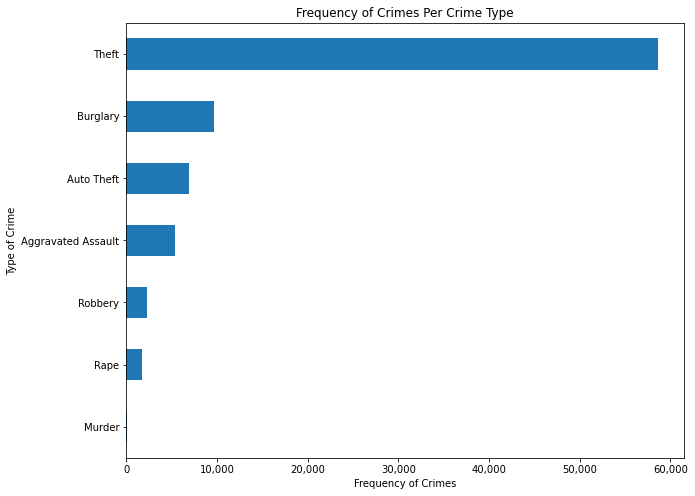

In [8]:
## Plot these for better visualization
crime_type_df = Newdata['Category Description'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = crime_type_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
# plt.savefig("../austin_crime_project/Resources")

In [9]:
Newdata['Year'] = pd.DatetimeIndex(Newdata['Occurred Date Time']).year
Newdata.head()

,Highest Offense Description,Occurred Date Time,Occurred Time,Location Type,Zip Code,Category Description,X-coordinate,Y-coordinate,Location,Year
0,AGG ASLT STRANGLE/SUFFOCATE,1/1/2017 10:30,1030,HOTEL / MOTEL / ETC.,78753.0,Aggravated Assault,3130704.0,3130704.0,"(30.35979391, -97.688358)",2017
1,AGG ASSAULT,1/1/2017 0:07,7,STREETS / HWY / ROAD / ALLEY,78701.0,Aggravated Assault,3114768.0,3114768.0,"(30.26816195, -97.74136237)",2017
2,AGG ASSAULT,1/1/2017 4:20,420,PARKING LOTS / GARAGE,78723.0,Aggravated Assault,3131193.0,3131193.0,"(30.3186038, -97.68793685)",2017
3,AGG ASSAULT FAM/DATE VIOLENCE,1/1/2017 0:00,0,RESIDENCE / HOME,78745.0,Aggravated Assault,3099695.0,3099695.0,"(30.1960291, -97.79102086)",2017
4,AGG FORCED SODOMY,1/1/2017 21:29,2129,RESIDENCE / HOME,78753.0,Rape,0.0,0.0,NaN,2017


In [10]:
Newdata['Year'].value_counts()

2020    75292
2019    65654
2017    48836
2018    46680
Name: Year, dtype: int64

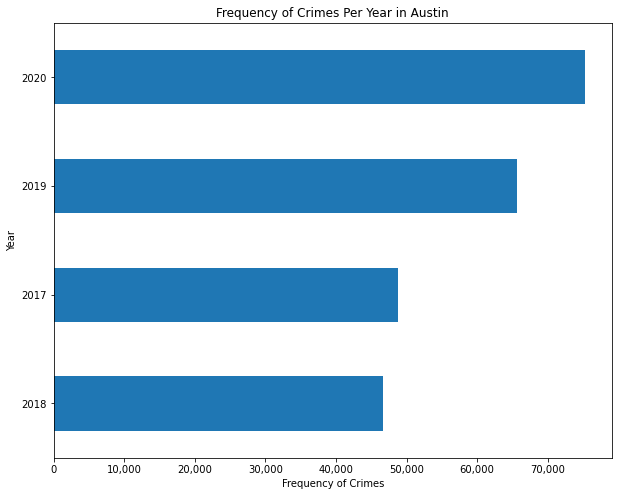

In [11]:
## Plot these for better visualization
crime_year_df = Newdata['Year'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Austin")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Year")
ax = crime_year_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [12]:
Newdata['Zip Code'].value_counts()

78758.0    18485
78753.0    18258
78741.0    17758
78745.0    15128
78704.0    14803
78744.0    14558
78701.0    13640
78723.0    12491
78702.0    12372
78752.0     8244
78759.0     7928
78748.0     7524
78757.0     6166
78705.0     5817
78751.0     5135
78724.0     4865
78721.0     4612
78727.0     3896
78749.0     3886
78703.0     3866
78729.0     3779
78754.0     3391
78750.0     3220
78731.0     3113
78746.0     2315
78617.0     2254
78747.0     1995
78735.0     1948
78756.0     1869
78722.0     1832
78717.0     1827
78660.0     1477
78726.0     1259
78719.0      834
78613.0      782
78739.0      605
78736.0      597
78725.0      569
78730.0      492
78653.0      461
78742.0      416
78728.0      168
78652.0      133
78712.0       48
78732.0       43
78733.0       17
78681.0       14
78610.0       14
78737.0       13
78664.0        8
78738.0        7
78734.0        3
78645.0        1
78641.0        1
78640.0        1
Name: Zip Code, dtype: int64

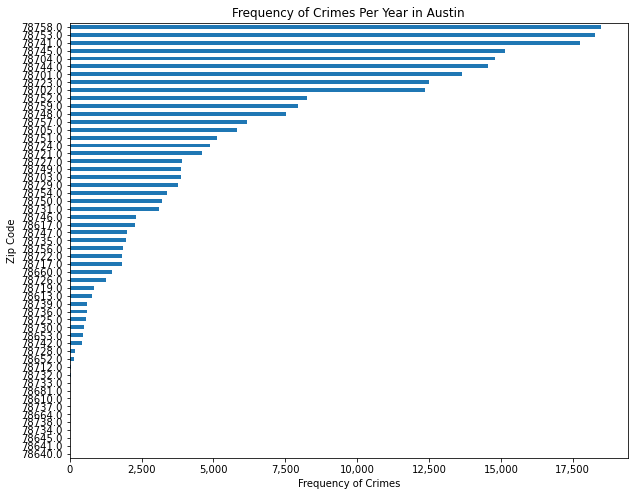

In [13]:
## Plot these for better visualization
crime_zip_df = Newdata['Zip Code'].value_counts(ascending=True)

## Some formatting to make it look nicer
fig=plt.figure(figsize=(10, 8))
plt.title("Frequency of Crimes Per Year in Austin")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Zip Code")
ax = crime_zip_df.plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))